In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [2]:
# Параметры
a = 0  # математическое ожидание
sigma2 = 2  # дисперсия
sigma = np.sqrt(sigma2)  # стандартное отклонение
gamma = 0.91  # доверительная вероятность
n = 20  # объем выборки
M = 1750  # количество выборок
K = 140  # количество повторений для оценки gamma*

In [3]:
gamma_star_list = []

for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s2 = np.var(X, ddof=1)
    delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
    sigma2_left = (n - 1) * s2 / delta_0
    sigma2_right = (n - 1) * s2 / delta_1
    # Проверяем, попадает ли истинная дисперсия в интервал
    if sigma2_left <= sigma2 <= sigma2_right:
        gamma_star_list.append(1)
    else:
        gamma_star_list.append(0)

gamma_star = np.mean(gamma_star_list)
print(f"1. Фактическая γ*: {gamma_star}")

1. Фактическая γ*: 0.9034285714285715


In [4]:
# 2. Повторить пункт 1, K раз, для получения массива gamma*
gamma_star_values = []

for _ in range(K):
    gamma_star_list = []
    for _ in range(M):
        X = np.random.normal(a, sigma, size=n)
        s2 = np.var(X, ddof=1)
        delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
        delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
        sigma2_left = (n - 1) * s2 / delta_0
        sigma2_right = (n - 1) * s2 / delta_1
        if sigma2_left <= sigma2 <= sigma2_right:
            gamma_star_list.append(1)
        else:
            gamma_star_list.append(0)
    gamma_star_values.append(np.mean(gamma_star_list))

In [5]:
# Характеристики распределения gamma*
mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values)

print(f"2. Математическое ожидание γ*: {mean_gamma_star}")
print(f"2. Дисперсия γ*: {var_gamma_star}")


2. Математическое ожидание γ*: 0.9095877551020408
2. Дисперсия γ*: 5.777757600999583e-05


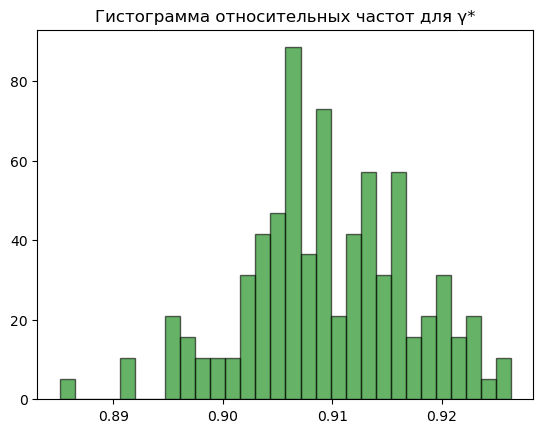

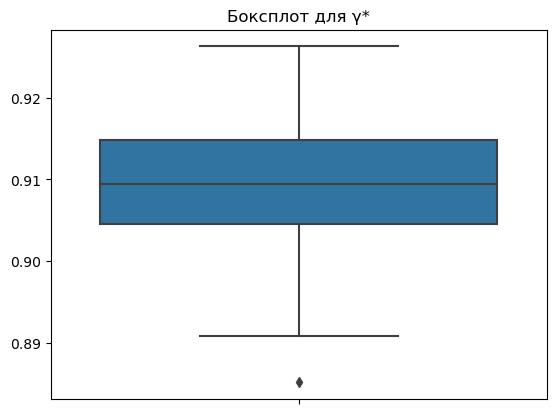

In [6]:
# Построение гистограммы и боксплота
plt.hist(gamma_star_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title("Гистограмма относительных частот для γ*")
plt.show()

sb.boxplot(y=gamma_star_values)
plt.title("Боксплот для γ*")
plt.show()

In [7]:
# 3 Смоделировать M выборок из n значений СВ W
sample_size_U = 7
true_variance_u = 9
true_variance_W = true_variance_u/sample_size_U
true_a = 3
count_g = 0
M_variance_array = []
for i in range(M):
    W = []
    for j in range(n):
        U = np.random.exponential(scale = true_a, size=sample_size_U)
        W_i = sum(U) / 7
        W.append(W_i)
    s2_W = np.var(W, ddof = 1)
    d_high = st.chi2.ppf(1/2+gamma/2, df = n-1)
    d_low = st.chi2.ppf(1/2-gamma/2, df = n-1)
    s2_low = (n-1) * s2_W / d_high
    s2_high = (n-1) * s2_W / d_low
    if s2_low <= true_variance_W <= s2_high: 
        count_g += 1
    M_variance_array.append((s2_low,s2_high))
gamma_star = count_g/M
print("Доверительные интервалы для каждой из M выборок: ", M_variance_array)
print("Точечная оценка gamma*: ", gamma_star)
#Примечание: Отклонение оценки от настоящей gamma обусловлено малой выборкой из U, обычно она должна быть >25

Доверительные интервалы для каждой из M выборок:  [(0.6272885271183273, 1.933841313408737), (0.7253871571114918, 2.2362654376647093), (1.2677055428989155, 3.908155890172583), (0.8911453245784824, 2.7472742931193928), (0.6592300461860123, 2.0323124738329263), (0.8574261734746362, 2.6433229459502625), (0.7375790756959186, 2.2738513886729175), (1.0840657180091602, 3.3420204280904495), (0.7729496651274592, 2.3828938853316024), (0.887539394839303, 2.7361577245844817), (0.4850903973865865, 1.495464703481), (0.6500685880367165, 2.0040690013409903), (0.6423550830857712, 1.9802893626253806), (0.7237923884441863, 2.2313489926783285), (0.8431740204004037, 2.599385585025475), (1.1076521194204298, 3.414733949081009), (0.6576529351734057, 2.027450464884634), (0.5846812066036292, 1.8024890040599832), (0.7625459958717615, 2.3508208526712853), (0.611546918023398, 1.8853121714090417), (0.8398999935838509, 2.589292225996348), (0.483090301908093, 1.4892986935830648), (1.0011618876514161, 3.086439710040121

In [8]:
# 4 Смоделировать K выборок из M, получение массива gamma_star
sample_size_U = 7
true_variance_u = 9
true_variance_W = true_variance_u/sample_size_U
true_a = 3
gamma_star_values = []
for _ in range(K):
    count_g = 0
    for i in range(M):
        W = []
        for j in range(n):
            U = np.random.exponential(scale = true_a, size=sample_size_U)
            W_i = sum(U) / 7
            W.append(W_i)
        s2_W = np.var(W, ddof = 1)
        d_high = st.chi2.ppf(1/2+gamma/2, df = n-1)
        d_low = st.chi2.ppf(1/2-gamma/2, df = n-1)
        s2_low = (n-1) * s2_W / d_high
        s2_high = (n-1) * s2_W / d_low
        if s2_low <= true_variance_W <= s2_high: 
            count_g += 1
    gamma_star = count_g/M
    gamma_star_values.append(gamma_star)

In [9]:
# Выборочные числовые характеристики
mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values, ddof=1)
std_gamma_star = np.std(gamma_star_values, ddof=1)
median_gamma_star = np.median(gamma_star_values)

In [10]:
print(f"Среднее значение gamma*: {mean_gamma_star}")
print(f"Дисперсия gamma*: {var_gamma_star}")
print(f"Стандартное отклонение gamma*: {std_gamma_star}")
print(f"Медиана gamma*: {median_gamma_star}")

Среднее значение gamma*: 0.861265306122449
Дисперсия gamma*: 6.1020282316420935e-05
Стандартное отклонение gamma*: 0.007811548010248733
Медиана gamma*: 0.8611428571428571


Text(0, 0.5, 'Относительная частота')

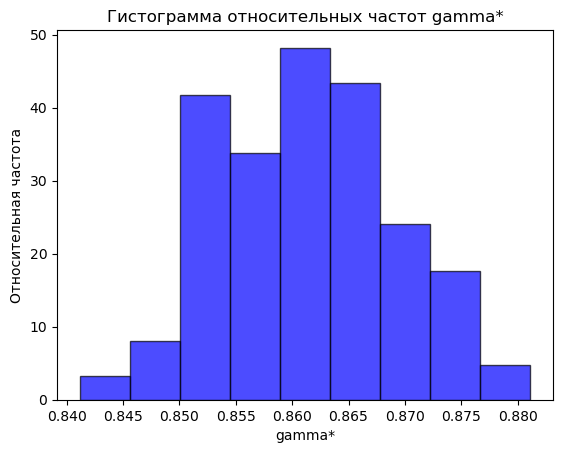

In [11]:
# Гистограмма
plt.hist(gamma_star_values, bins="sturges", density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Гистограмма относительных частот gamma*')
plt.xlabel('gamma*')
plt.ylabel('Относительная частота')

<Axes: >

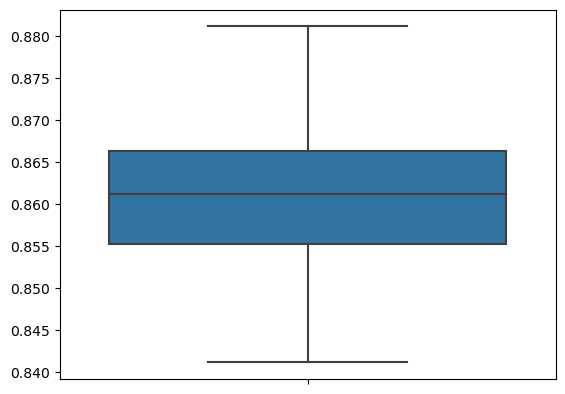

In [12]:
# Боксплот
sb.boxplot(y = gamma_star_values)

Распределение походит на нормальное?